# Portoflio Signal Combination Analysis
Date: 2020-09-08

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import *

from src.analytics.signal import Signal
from src.analytics.performance import Statistics

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [30]:
from datetime import datetime

from src.constant import *
from src.execution.signals import *
from src.execution.portfolio import Portfolio

In [31]:
cubby = Cubby()
ibs = IBS()
butterfly = Butterfly3X()
factor = Factor()

## Equal Weight

In [79]:
signals = [cubby, ibs, butterfly, factor]
notional = 60000
date = TODAY

In [33]:
portfolio = Portfolio(signals, notional=notional)

In [34]:
await portfolio.run()

[2020-09-08 21:53:50.610] [INFO] [portfolio:_update:76] Updating Cubby
[2020-09-08 21:53:50.658] [INFO] [portfolio:_update:76] Updating IBS
[2020-09-08 21:53:54.750] [INFO] [portfolio:_update:76] Updating Butterfly3X
[2020-09-08 21:53:56.090] [INFO] [portfolio:_update:76] Updating Factor


In [36]:
portfolio.trade_list(date)

{'DGRO': 94,
 'HDV': -91,
 'MIDU': 116,
 'MTUM': 27,
 'QUAL': 36,
 'SPXL': -49,
 'TMF': 372,
 'TQQQ': 63,
 'UDOW': 99,
 'USMV': 59,
 'VLUE': -101}

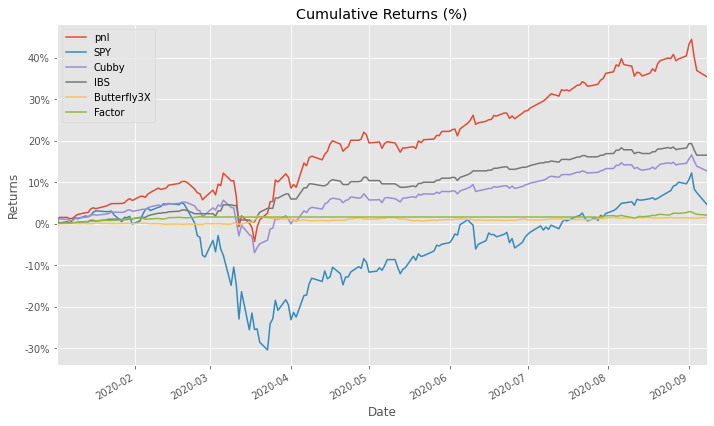

In [37]:
portfolio.cumulative_returns()

In [38]:
portfolio.yearly_stats()

,Sharpe,Sortino,Win,Max,Min,Return,Count
Year,,,,,,,
2014,3.6830,5.2750,0.6331,0.0108,-0.0131,0.1643,139.0
2015,0.3376,0.4471,0.5317,0.0231,-0.0310,0.0305,252.0
2016,0.4540,0.5598,0.5159,0.0153,-0.0308,0.0387,252.0
2017,3.3861,5.1204,0.6215,0.0139,-0.0169,0.2514,251.0
2018,0.1699,0.2217,0.5219,0.0199,-0.0303,0.0124,251.0
2019,2.4009,3.4590,0.5913,0.0200,-0.0180,0.2281,252.0
2020,2.2849,2.6093,0.6532,0.0537,-0.0676,0.3535,173.0


## Signal Combination

In [39]:
from src.analytics.signal import Combination

In [40]:
returns = portfolio.returns[[signal.name for signal in signals]]

In [41]:
returns['uniform'] = Combination.uniform(returns)

In [42]:
returns['gmm'] = Combination.info_rate(returns)

In [43]:
returns['mvo'] = Combination.mvo(returns)  # This is slow

In [44]:
returns  # MVO doesn't look correct

,Cubby,IBS,Butterfly3X,Factor,uniform,gmm,mvo
Date,,,,,,,
2014-06-16,0.001244,0.000000,0.000011,-0.000652,0.000151,NaN,0.0
2014-06-17,-0.002237,-0.002237,0.000339,0.000214,-0.000980,NaN,0.0
2014-06-18,0.005218,0.005218,0.000738,-0.000418,0.002689,-0.001868,0.0
2014-06-19,-0.004768,-0.004768,-0.000420,-0.000303,-0.002565,-0.001168,0.0
2014-06-20,0.003460,0.003460,-0.000067,-0.000099,0.001688,-0.000350,0.0
...,...,...,...,...,...,...,...
2020-09-01,0.009055,0.009055,-0.000657,0.002482,0.004984,0.003397,0.0
2020-09-02,0.008517,0.000000,0.000675,-0.000937,0.002064,0.001623,0.0
2020-09-03,-0.012846,-0.012846,-0.000753,-0.003298,-0.007436,-0.004863,0.0


In [58]:
returns = returns.drop('mvo', axis=1)

In [54]:
from src.execution.performance import yearly_stats

In [61]:
stats = []
for col in returns.columns:
    stats.append(yearly_stats(returns[col]))

In [80]:
from src.utils.jupyter import display_dfs

In [82]:
display_dfs(stats, returns.columns)

,Sharpe,Sortino,Win,Max,Min,Return,Count
Year,,,,,,,
2014,3.3083,4.492,0.6403,0.0067,-0.0086,0.0865,139
2015,0.152,0.2107,0.5397,0.0115,-0.0158,0.0079,252
2016,0.8762,1.2287,0.5357,0.0117,-0.0151,0.0481,252
2017,3.1158,4.7794,0.6255,0.0071,-0.0079,0.1243,251
2018,-0.3123,-0.4347,0.502,0.0155,-0.0149,-0.0236,251
2019,2.9261,4.6917,0.5833,0.0095,-0.0085,0.1532,252
2020,1.3888,1.462,0.6243,0.028,-0.0406,0.1269,173
,Sharpe,Sortino,Win,Max,Min,Return,Count
Year,,,,,,,


## Conclusion: Uniform